In [1]:
import cdsapi
import urllib3

In [2]:
urllib3.disable_warnings()

In [3]:
c = cdsapi.Client()

In [12]:
day = 21
month = 8
year = 1996

In [13]:
lat = -34.776
lon = 20.04

In [ ]:
c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            'geopotential', 'specific_rain_water_content', 'temperature',
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': '1000',
        'year': '1996',
        'month': '08',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -33, 19, -35,
            21,
        ],
    },
    'download.grib')

2022-02-15 13:00:12,369 INFO Welcome to the CDS
2022-02-15 13:00:12,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2022-02-15 13:00:12,558 INFO Request is queued


In [15]:
import xarray as xr

In [16]:
ds = xr.load_dataset("download.grib", engine="cfgrib")

2022-02-16 09:48:24,431 WARNING Ignoring index file '/home/peter/Documents/2Oceans/download.grib.90c91.idx' older than GRIB file
2022-02-16 09:48:28,849 INFO missing from GRIB stream: 'directionNumber'
2022-02-16 09:48:28,851 INFO missing from GRIB stream: 'frequencyNumber'
2022-02-16 09:48:28,893 INFO missing from GRIB stream: 'directionNumber'
2022-02-16 09:48:28,895 INFO missing from GRIB stream: 'frequencyNumber'
2022-02-16 09:48:28,927 INFO missing from GRIB stream: 'directionNumber'
2022-02-16 09:48:28,927 INFO missing from GRIB stream: 'frequencyNumber'
2022-02-16 09:48:28,935 INFO missing from GRIB stream: 'directionNumber'
2022-02-16 09:48:28,936 INFO missing from GRIB stream: 'frequencyNumber'
2022-02-16 09:48:29,013 INFO missing from GRIB stream: 'directionNumber'
2022-02-16 09:48:29,014 INFO missing from GRIB stream: 'frequencyNumber'


In [17]:
ds

<xarray.Dataset>
Dimensions:        (time: 168, latitude: 9, longitude: 9)
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 1996-08-01 ... 1996-08-07T23:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 1000
  * latitude       (latitude) float64 -33.0 -33.25 -33.5 ... -34.5 -34.75 -35.0
  * longitude      (longitude) float64 19.0 19.25 19.5 19.75 ... 20.5 20.75 21.0
    valid_time     (time) datetime64[ns] 1996-08-01 ... 1996-08-07T23:00:00
Data variables:
    z              (time, latitude, longitude) float32 1.412e+03 ... 1.797e+03
    crwc           (time, latitude, longitude) float32 5.96e-08 0.0 ... 5.96e-08
    t              (time, latitude, longitude) float32 282.7 282.1 ... 285.3
    u              (time, latitude, longitude) float32 -1.414 0.04291 ... 2.969
    v              (time, latitude, longitude) float32 -1.574 ... -0.7616
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-16T09:48:29 GRIB to CDM+CF via cfgrib-0....

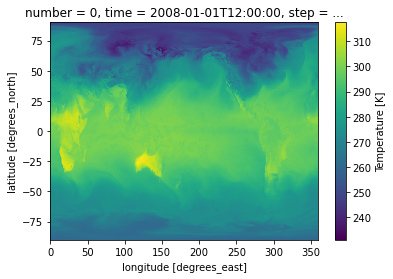

In [10]:
ds.t.plot()